Creating HARP plots for my G0.55-0.85 paper. 

Currently: Taking CO data plotting integrated intensity image and plotting vevlocities

In [2]:
# Aplpy

import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxesSubplot

from astropy.table import Table
import astropy.units as u
import numpy as np
import aplpy


import astropy.units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

In [45]:
fitsfile_12co_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_integ.fits'
fitsfile_12co_integhigh = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_cliphigh_integ.fits'
fitsfile_12co_integlow = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_cliplow_integ.fits'

fitsfile_12co_tex = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_clip_peak_5sigma_Tex.fits'

fitsfile_13co_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/13co/ga20150604_34_2_reduced_velclip_integ_TRx.fits'
fitsfile_c18o_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/c18o/ga20150604_34_1_reduced_velclip_integ_TRx.fits'

fitsfile_s850_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/scuba2/850um_corr_map_mJybeam_2D.fits'
fitsfile_s450_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/scuba2/s450um_map_uncal_cal_2D_align.fits'


fitsfile_13co_tex = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/13co/ga20170608_23_2_mos_vclip_peak_TRx_5sigma_masked_Tex.fits'

fitsfile_13coc18o_ratio = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/R1318_5sigma.fits'

rms_12co_integ = 8
rms_13co_integ = 5
rms_s850_integ = None
rms_s450_integ = None

Presenting the 12CO data:

In [4]:
co13_integ_contourlevels = np.arange((rms_13co_integ*3), 160, (rms_13co_integ*3))
print (co13_integ_contourlevels)

[ 15  30  45  60  75  90 105 120 135 150]


In [5]:
position_Jelly = SkyCoord(l=0.57*u.degree, b=-0.87*u.degree, frame='galactic')
position_Jelly.fk5.ra.deg

267.5924230182249

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmax to  2.985e+02 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Setting slices=[0] [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting resolution to 17.66 dpi [aplpy.core]


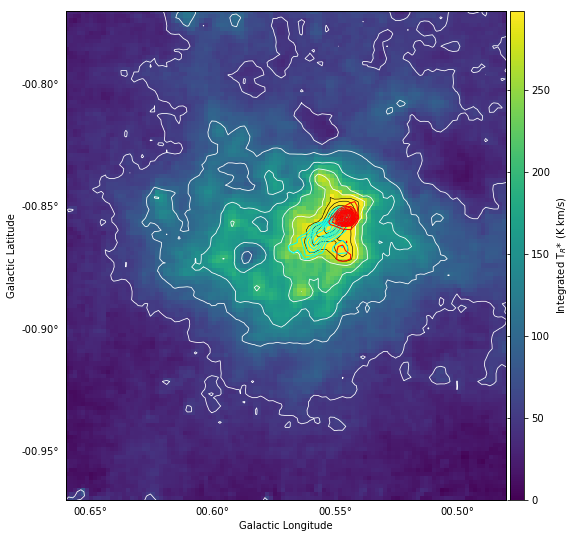

In [37]:
co12_integ = aplpy.FITSFigure(fitsfile_12co_integ)

co12_integ.show_colorscale(vmin=0.0,cmap='viridis') # stretch='sqrt',
co12_integ.add_colorbar()
co12_integ.colorbar.set_axis_label_text('Integrated T$_{R}$* (K km/s)')

# co12_integ.recenter(0.57,-0.87, width=0.18, height=0.20)
co12_integ.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)


co12_integ.show_contour(fitsfile_12co_integ, levels=[50,100,150,200,250], colors='white', linewidths=0.8)
# co12_integ.show_contour(fitsfile_12co_integ, levels=[150,200,250], colors='grey', linewidths=0.8)
co12_integ.show_contour(fitsfile_12co_integ, levels=[300,350,400,450,500,550,600,650,700,750,800], colors='black', linewidths=0.6)


co_integ_contourlevels = np.arange(25, 160, 10)
co12_integ.show_contour(fitsfile_12co_integhigh, levels=co_integ_contourlevels, colors='aqua', linewidths=1.0)
co12_integ.show_contour(fitsfile_12co_integlow, levels=co_integ_contourlevels, colors='red', linewidths=1.0)


co12_integ.tick_labels.set_xformat('ddd.dd')
co12_integ.tick_labels.set_yformat('ddd.dd')

co12_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-integ-contours.pdf')
co12_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-integ-contours.png')

/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 17.66 dpi [aplpy.core]


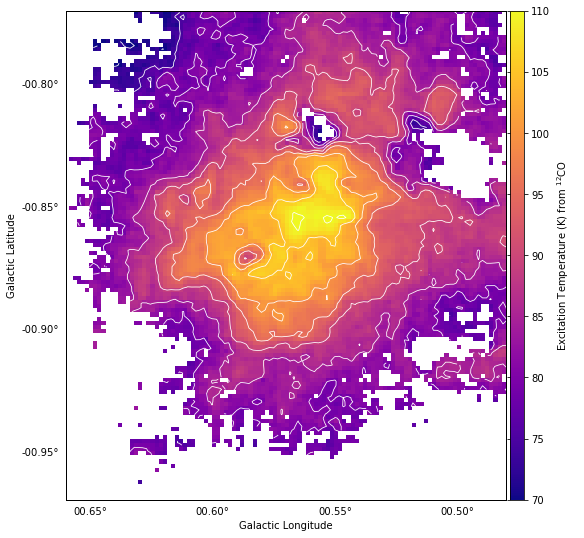

In [41]:
co12_tex = aplpy.FITSFigure(fitsfile_12co_tex)

co12_tex.show_colorscale(vmin=70,vmax=110,cmap='plasma')#cmap='viridis') # stretch='sqrt',vmin=0.0,
co12_tex.add_colorbar()
co12_tex.colorbar.set_axis_label_text('Excitation Temperature (K) from $^{12}$CO')

# co12_tex.recenter(0.57,-0.87, width=0.18, height=0.20)
co12_tex.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

co12_tex.show_contour(fitsfile_12co_tex, levels=[70,75,80,85,90,95,100,105,110,115,120], colors='white', linewidths=0.8)

co12_tex.tick_labels.set_xformat('ddd.dd')
co12_tex.tick_labels.set_yformat('ddd.dd')

co12_tex.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-tex-contours.pdf')
co12_tex.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-tex-contours.png')

/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 17.66 dpi [aplpy.core]


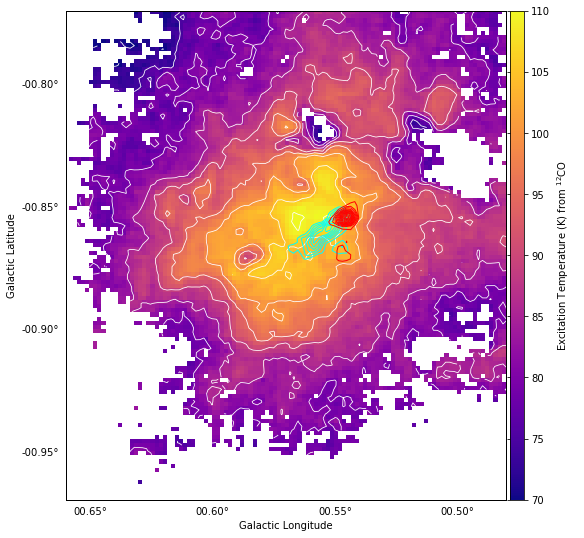

In [42]:
co12_tex = aplpy.FITSFigure(fitsfile_12co_tex)

co12_tex.show_colorscale(vmin=70,vmax=110,cmap='plasma') # stretch='sqrt',vmin=0.0,
co12_tex.add_colorbar()
co12_tex.colorbar.set_axis_label_text('Excitation Temperature (K) from $^{12}$CO')

# co12_tex.recenter(0.57,-0.87, width=0.18, height=0.20)
co12_tex.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

co12_tex.show_contour(fitsfile_12co_tex, levels=[70,75,80,85,90,95,100,105,110,115,120], colors='white', linewidths=0.8)

co_integ_contourlevels = np.arange(25, 160, 10)
co12_tex.show_contour(fitsfile_12co_integhigh, levels=co_integ_contourlevels, colors='aqua', linewidths=1.0)
co12_tex.show_contour(fitsfile_12co_integlow, levels=co_integ_contourlevels, colors='red', linewidths=1.0)


co12_tex.tick_labels.set_xformat('ddd.dd')
co12_tex.tick_labels.set_yformat('ddd.dd')

co12_tex.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-tex-contours-plus-outflow.pdf')
co12_tex.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-tex-contours-plus-outflow.png')

Presenting the 13CO data

INFO: Auto-setting vmax to  6.882e+01 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 14.5628 dpi [aplpy.core]


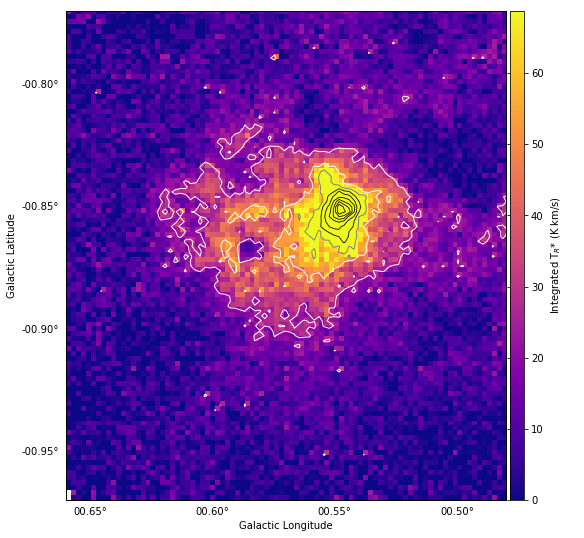

In [43]:
co13_integ = aplpy.FITSFigure(fitsfile_13co_integ)

co13_integ.show_colorscale(vmin=0.0,cmap='plasma') # stretch='sqrt',
co13_integ.add_colorbar()
co13_integ.colorbar.set_axis_label_text('Integrated T$_{R}$* (K km/s)')

co13_integ.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

co13_integ.show_contour(fitsfile_13co_integ, levels=[25,50,], colors='white', linewidths=1.0)
co13_integ.show_contour(fitsfile_13co_integ, levels=[75], colors='grey', linewidths=1.0)
co13_integ.show_contour(fitsfile_13co_integ, levels=[100,125,150,175,200,225,250,300], colors='black', linewidths=0.8)

co13_integ.tick_labels.set_xformat('ddd.dd')
co13_integ.tick_labels.set_yformat('ddd.dd')

co13_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-13co-integ-contours.pdf')
co13_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-13co-integ-contours.png')

/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 14.5628 dpi [aplpy.core]


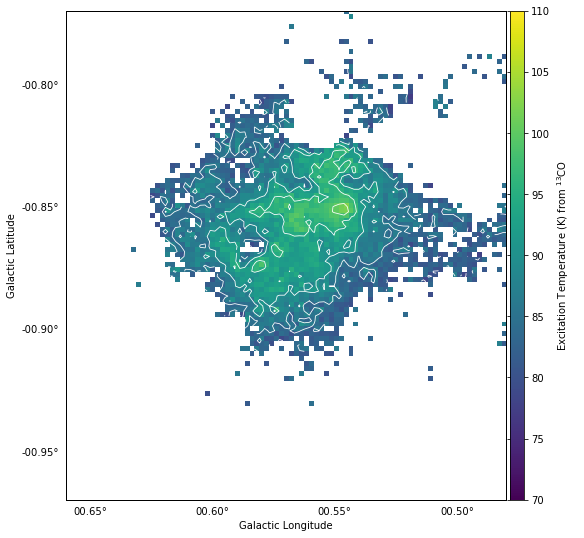

In [30]:
co13_tex = aplpy.FITSFigure(fitsfile_13co_tex)

co13_tex.show_colorscale(vmin=70,vmax=110,cmap='viridis') # stretch='sqrt',vmin=0.0,
co13_tex.add_colorbar()
co13_tex.colorbar.set_axis_label_text('Excitation Temperature (K) from $^{13}$CO')

# co13_tex.recenter(0.57,-0.87, width=0.18, height=0.20)
co13_tex.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

co13_tex.show_contour(fitsfile_13co_tex, levels=[70,75,80,85,90,95,100,105], colors='white', linewidths=0.8)

co13_tex.tick_labels.set_xformat('ddd.dd')
co13_tex.tick_labels.set_yformat('ddd.dd')

co13_tex.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-13co-tex-contours.pdf')
co13_tex.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-13co-tex-contours.png')

Presenting the C18O data

INFO: Auto-setting vmax to  3.554e+01 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 14.5628 dpi [aplpy.core]


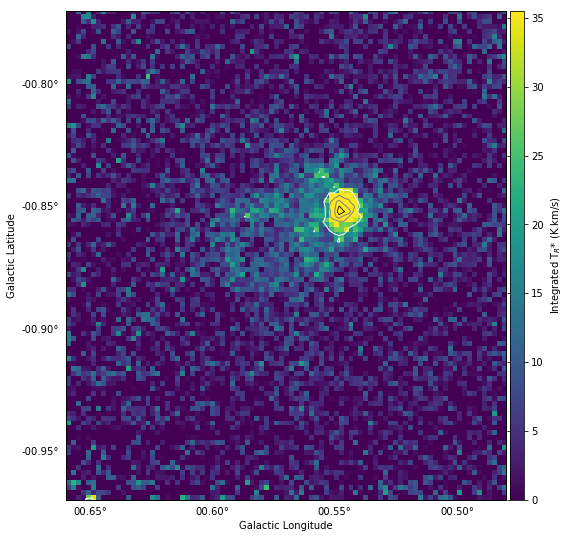

In [31]:
c18o_integ = aplpy.FITSFigure(fitsfile_c18o_integ)

c18o_integ.show_colorscale(vmin=0.0,cmap='viridis') # stretch='sqrt',
c18o_integ.add_colorbar()
c18o_integ.colorbar.set_axis_label_text('Integrated T$_{R}$* (K km/s)')

c18o_integ.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

c18o_integ.show_contour(fitsfile_c18o_integ, levels=[25,], colors='white', linewidths=1.0)
c18o_integ.show_contour(fitsfile_c18o_integ, levels=[50,75], colors='grey', linewidths=1.0)
c18o_integ.show_contour(fitsfile_c18o_integ, levels=[100,125,], colors='black', linewidths=0.8)

c18o_integ.tick_labels.set_xformat('ddd.dd')
c18o_integ.tick_labels.set_yformat('ddd.dd')

c18o_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-c18o-integ-contours.pdf')
c18o_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-c18o-integ-contours.png')


13co c18o ratio maps

INFO: Auto-setting vmin to  1.155e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.817e+00 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Setting slices=[0] [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting resolution to 14.5628 dpi [aplpy.core]


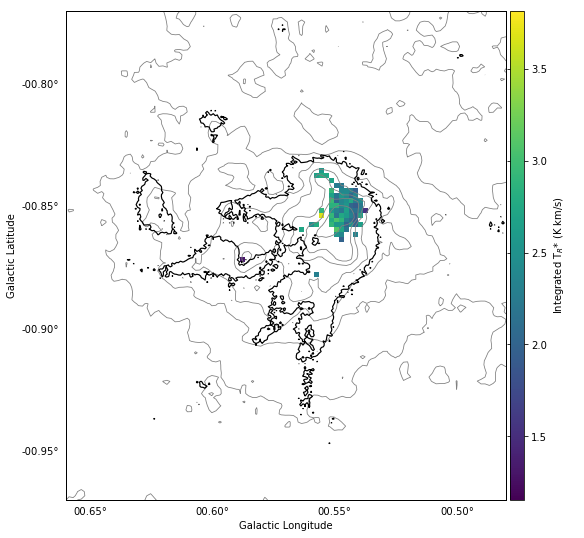

In [51]:
opacity_ratio = aplpy.FITSFigure(fitsfile_13coc18o_ratio )

opacity_ratio.show_colorscale(cmap='viridis') # stretch='sqrt',
opacity_ratio.add_colorbar()
opacity_ratio.colorbar.set_axis_label_text('Integrated T$_{R}$* (K km/s)')

opacity_ratio.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

opacity_ratio.show_contour(fitsfile_12co_integ, levels=[50,100,150,200,250], colors='grey', linewidths=0.8)
opacity_ratio.show_contour(fitsfile_12co_integ, levels=[300,400], colors='grey', linewidths=0.8)

opacity_ratio.show_contour(fitsfile_s850_integ, levels=[0.5,], colors='black', linewidths=1.2)


opacity_ratio.tick_labels.set_xformat('ddd.dd')
opacity_ratio.tick_labels.set_yformat('ddd.dd')

opacity_ratio.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-13co-c18o-ratio.pdf')
opacity_ratio.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-13co-c18o-ratio.png')


Presenting SCUBA-2 data

INFO: Auto-setting vmax to  3.865e+00 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 35.3201 dpi [aplpy.core]


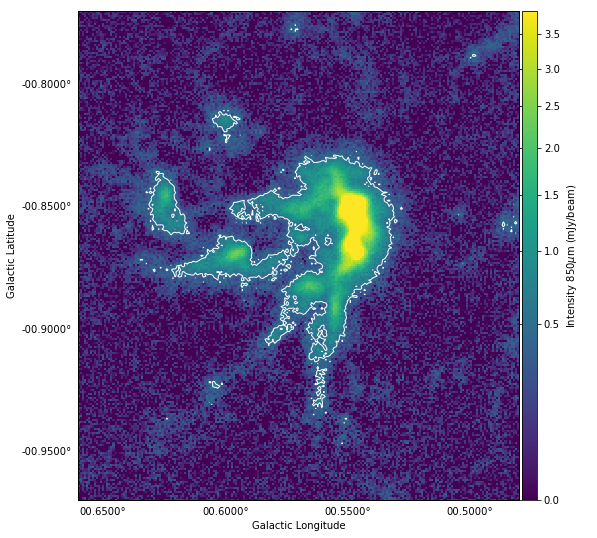

In [32]:
s850_im = aplpy.FITSFigure(fitsfile_s850_integ)

s850_im.show_colorscale(vmin=0,cmap='viridis',stretch='sqrt') # 
s850_im.add_colorbar()
s850_im.colorbar.set_axis_label_text('Intensity 850$\mu$m (mJy/beam)')

s850_im.show_contour(fitsfile_s850_integ, levels=[0.5,], colors='white', linewidths=1.0)


s850_im.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)


s850_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-s850-integ-contours.pdf')
s850_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-12co-integ-contours.png')

INFO: Auto-setting vmax to  1.221e+04 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 35.3201 dpi [aplpy.core]


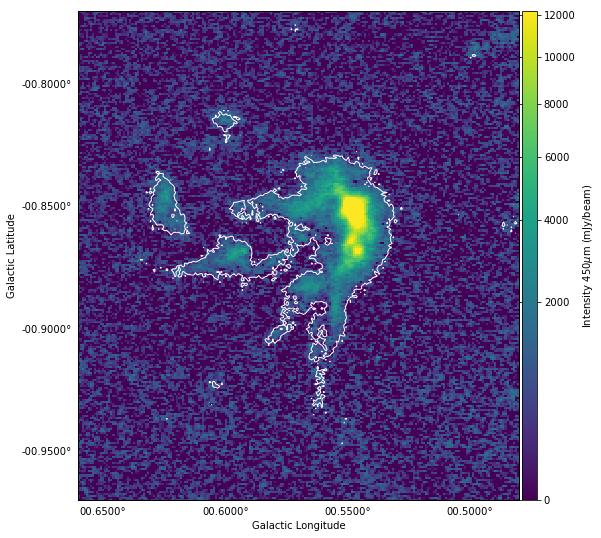

In [33]:
s450_im = aplpy.FITSFigure(fitsfile_s450_integ)

s450_im.show_colorscale(vmin=0,cmap='viridis',stretch='sqrt') # 
s450_im.add_colorbar()
s450_im.colorbar.set_axis_label_text('Intensity 450$\mu$m (mJy/beam)')

s450_im.show_contour(fitsfile_s850_integ, levels=[0.5,], colors='white', linewidths=1.0)

s450_im.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.18, height=0.20)

s450_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-s450-integ-contours.pdf')
s450_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-s450-integ-contours.png')

Depicting the outflows in the region from the 12CO data

black and white baclground with blue contours: and red contours:

INFO: Auto-setting vmax to  3.865e+00 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Setting slices=[0] [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting resolution to 17.66 dpi [aplpy.core]


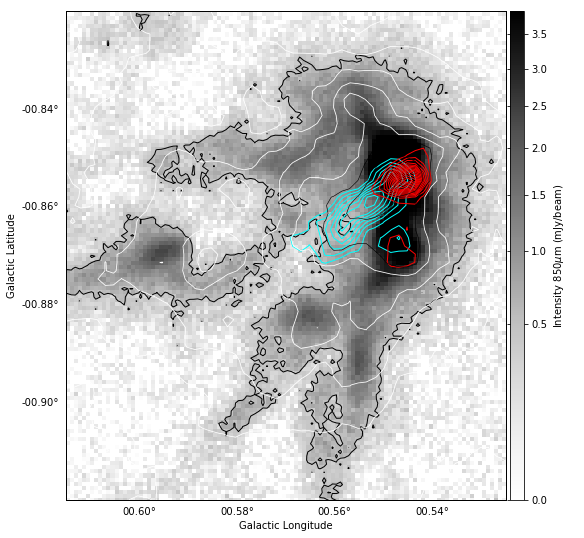

In [34]:
outflows = aplpy.FITSFigure(fitsfile_s850_integ)

co_integ_contourlevels = np.arange(25, 160, 10)

outflows.show_colorscale(vmin=0.0,stretch='sqrt',cmap='Greys')
outflows.add_colorbar()
outflows.colorbar.set_axis_label_text('Intensity 850$\mu$m (mJy/beam)')

outflows.recenter(position_Jelly.l.deg,position_Jelly.b.deg, width=0.09, height=0.10)

outflows.show_contour(fitsfile_s850_integ, levels=[0.5,], colors='black', linewidths=1.0)
outflows.show_contour(fitsfile_12co_integhigh, levels=co_integ_contourlevels, colors='aqua', linewidths=1.0)
outflows.show_contour(fitsfile_12co_integlow, levels=co_integ_contourlevels, colors='red', linewidths=1.0)

outflows.show_contour(fitsfile_12co_integ, levels=[50,100,150,200,250], colors='white', linewidths=0.8)
# outflows.show_contour(fitsfile_12co_integ, levels=[150,200,250], colors='grey', linewidths=0.8)
outflows.show_contour(fitsfile_12co_integ, levels=[300,400], colors='black', linewidths=0.6)

outflows.tick_labels.set_xformat('ddd.dd')
outflows.tick_labels.set_yformat('ddd.dd')

outflows.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-outflows-contours.pdf')
outflows.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-outflows-contours.png')

IRAC 8um data & MIPS 24um data

from: http://sha.ipac.caltech.edu/applications/Spitzer/SHA/#id=SearchByPosition&RequestClass=ServerRequest&DoSearch=true&SearchByPosition.field.radius=0.15&SearchByPosition.field.matchByAOR=false&UserTargetWorldPt=267.56375;-28.90083333333;EQ_J2000&TargetPanel.field.targetName=GAL%20000.55-00.85&SimpleTargetPanel.field.resolvedBy=nedthensimbad&MoreOptions.field.prodtype=aor,pbcd&InstrumentPanel.field.irac=_all_&InstrumentPanel.field.mips=_all_&InstrumentPanel.field.irs=_none_&InstrumentPanel.field.panel=instrument&shortDesc=Position&isBookmarkAble=true&isDrillDownRoot=true&isSearchResult=true

lies outside of MIPS 24um data - there is only a smidge of data on the edge of the field. :(

FROM STEVE: RE: IMAGE ROTATION

Apologies - the code I was remembering was dealing with imshow and I rotated the output image following a similar procedure as the one presented here:

https://github.com/tiagopereira/python_tips/wiki/Scipy:-image-rotation

perhaps the image you feed to aplpy can be pre-rotated before you run FITSFigure? It blows my mind that a "rotate" function isn't included.

In [ ]:
fitsfile_irac_8um = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/IRAC-8um/Level-2-(PBCD)--IRAC-8.0um.fits'
fitsfile_mips_24um = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/MIPS-24um/Level-2-(PBCD)--MIPS-24um.fits'

In [ ]:
irac8um_im = aplpy.FITSFigure(fitsfile_irac_8um)
irac8um_im.show_colorscale(vmin=0,cmap='magma',stretch='sqrt') # 
irac8um_im.recenter(position_Jelly.fk5.ra.deg,position_Jelly.fk5.dec.deg, width=0.18, height=0.20)

sc2_integ_contourlevels = np.arange(0.5, 30, 1)
co_integ_contourlevels = np.arange(50, 800, 50)

irac8um_im.show_contour(fitsfile_s850_integ, levels=sc2_integ_contourlevels, colors='black', linewidths=1.0)
irac8um_im.show_contour(fitsfile_12co_integ, levels=co_integ_contourlevels, colors='white', linewidths=0.8)

irac8um_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-irac8um-contours.pdf')
irac8um_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-irac8um-contours.png')

In [ ]:
mips24um_im = aplpy.FITSFigure(fitsfile_mips_24um)
mips24um_im.show_colorscale(vmin=0,cmap='magma',stretch='sqrt') # 
mips24um_im.recenter(position_Jelly.fk5.ra.deg,position_Jelly.fk5.dec.deg, width=0.18, height=0.20)

sc2_integ_contourlevels = np.arange(0.5, 30, 1)
co_integ_contourlevels = np.arange(50, 800, 50)

mips24um_im.show_contour(fitsfile_s850_integ, levels=sc2_integ_contourlevels, colors='black', linewidths=1.0)
mips24um_im.show_contour(fitsfile_12co_integ, levels=co_integ_contourlevels, colors='white', linewidths=0.8)

mips24um_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-mips24um-contours.pdf')
mips24um_im.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-mips24um-contours.png')

3 colour image? I need motage - downloaded from git and addded it to python folder in my home space... now need to figure out my path http://aplpy.readthedocs.io/en/stable/howto_rgb.html http://www.astropy.org/montage-wrapper/ downloaded from here: https://github.com/Caltech-IPAC/Montage


In [ ]:
import montage_wrapper as montage

In [ ]:
aplpy.make_rgb_cube([fitsfile_12co_integ, fitsfile_850um_integ,
                     fitsfile_irac_8um], '/Users/hparsons/Documents/EAO/Research/JellyFish/data/3c_cube.fits')